# Plots: errors examples

In [1]:
import sys
sys.path.append("..\\source\\")
import utils as utils
import glob
import datetime as dt

# Data and numbers
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.preprocessing import MinMaxScaler

# Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker
import matplotlib.dates as mdates
mpl.style.use('ggplot')
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

# Palettes
from matplotlib.colors import ListedColormap
from palettable.colorbrewer.qualitative import Set2_8

In [2]:
# Pallete
cmap_orig = Set2_8.mpl_colors # callable
cmap = [cmap_orig[7],cmap_orig[6],cmap_orig[4],cmap_orig[3],cmap_orig[1],cmap_orig[0]]

In [3]:
path_data = "..\\data\\processed\\summary\\"
path_meta = "..\\data\\original\\metadata\\"
path_res = "..\\results\\"
path_fig = "..\\figures\\"

In [4]:
ref = {0:"Good fit", 
1:"A1", 
2:"A2", 
3:"A3", 
4:"A4", 
5:"B1",
6:"B2",
7:"B3",
8:"B4",
9:"C1",
10:"C2",
11:"C3",
12:"C4",
13:"D1",
14:"D2",
15:"D3",
16:"D4",
17:"Undefined"}

In [5]:
#color blind
color_ref = {0:"silver",
1:plt.cm.tab20(6), 
2:plt.cm.tab20(7),
3:plt.cm.tab20(2),
4:plt.cm.tab20(3), 
5:plt.cm.tab20(4), 
6:plt.cm.tab20(5), 
7:plt.cm.tab20(16), 
8:plt.cm.tab20(17),
9:plt.cm.tab20(0), 
10:plt.cm.tab20(1),
11:plt.cm.tab20(18),
12:plt.cm.tab20(19),
13:plt.cm.tab20(8), 
14:plt.cm.tab20(9),
15:plt.cm.tab20(12),
16:plt.cm.tab20(13),
17:"white"}

# Example plots

In [6]:
meter = "electricity"

In [26]:
"""site = 3

# Load winner submission
winner = pd.read_pickle("..\\temp\\data_out\\processed\\merged\\by_sub\\sub13865820_merged.pickle.gz")
# Load metadata
meta = pd.read_csv("..\\data\\original\\metadata\\building_metadata.csv")
# List of buildings in site 10 (selected to use as example)
bdgs = list(meta.loc[meta.site_id == site, "building_id"])
# Filter hotwater (3) and buildings from site 10
winner = winner[(winner.meter == 0) & (winner.building_id.isin(bdgs) == True)]
# to timestamp
winner.timestamp = pd.to_datetime(winner.timestamp, format="%Y-%m-%d %H:%M:%S")
winner.to_csv(f"winner_solution_{meter}_site{site}.csv", index=False)"""

In [7]:
# Load RMSLE array data
df_site3 = pd.read_csv(f"..\\data\\processed\\arrays\\{meter}_RMSLE_site_3.csv")
# Load winner submission
winner_site3 = pd.read_csv(f"winner_solution_{meter}_site3.csv",parse_dates=["timestamp"])

## Error 1: long term error (> 3 consecutive days)
Electricity - Site 3 - Bdg 330

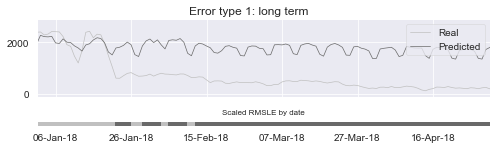

In [90]:
winner = winner_site3.copy()
df = df_site3.copy()
df.set_index("building_id", inplace=True)
df = (df > 0.1).astype(int)

error_name = "1"
desc = "long term"
bdg = 330
color_normal = "silver"
color = "dimgrey"
ratios = [3,0.2]
start = dt.date(2018, 1, 1)
end = dt.date(2018, 5, 1)

#Create figure canvas
fig, axes = plt.subplots(2, 1, sharex = True, sharey=False, figsize=(7,2), gridspec_kw = {"height_ratios": ratios})
axes = axes.flatten()

# METER READING AND PREDICTION LINEPLOT
temp = winner.loc[winner.building_id == bdg,["timestamp","meter_reading","submission"]]
temp.set_index("timestamp",inplace=True)
# Resample
temp = temp.resample('24H').sum().reset_index()

ax = axes[0]
sns.lineplot(data=temp, x="timestamp",y="meter_reading", ax=ax, color=color_normal, linewidth = 0.7)
sns.lineplot(data=temp, x="timestamp",y="submission", ax=ax, color=color, linewidth = 0.7)
ax.set_xlim([start, end])
ax.set_ylabel("")
#ax.set_title(f"Electricity - Building {bdg}",fontsize=8)
ax.legend(labels=['Real','Predicted'], loc = "upper right")

# ERROR HEATMAP
# Get the data
y = np.linspace(0, 1, 2)
x = pd.date_range(start='2017-01-01', end='2019-01-01')
temp1 = pd.DataFrame(df.loc[bdg,:]).T
# Error heatmap Plot
ax = axes[-1]
cmap = ListedColormap([color_normal, color, color])
cmap.set_bad(color=color)
qmesh = ax.pcolormesh(x, y, temp1, cmap=cmap, rasterized=True)
ax.xaxis.set_major_locator(plt.MaxNLocator(7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
ax.set_xlim([start, end])
ax.set_title(f"Scaled RMSLE by date",fontsize=8)
ax.set_yticklabels([])

# Figure parameters
plt.tight_layout()
fig.suptitle(f"Error type {error_name}: {desc}", y = 1.015, x = 0.5, fontsize=12)

fig.savefig(path_fig + f"error{error_name}_example.pdf", dpi=150, bbox_inches="tight")
fig.savefig(path_fig + f"error{error_name}_example.png", dpi=150, bbox_inches="tight")

## Error 2: mid term error ( 1< consecutive days <= 3)
Electricity - Site 3 - Bdg 495

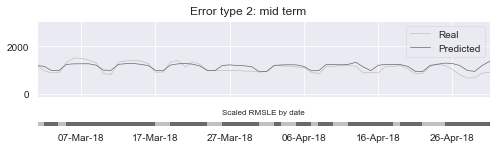

In [91]:
winner = winner_site3.copy()
df = df_site3.copy()
df.set_index("building_id", inplace=True)
df = (df > 0.01).astype(int)

error_name = "2"
desc = "mid term"
bdg = 495
color_normal = "silver"
color = "dimgrey"
ratios = [3,0.2]
start = dt.date(2018, 3, 1)
end = dt.date(2018, 5, 1)

#Create figure canvas
fig, axes = plt.subplots(2, 1, sharex = True, sharey=False, figsize=(7,2), gridspec_kw = {"height_ratios": ratios})
axes = axes.flatten()

# METER READING AND PREDICTION LINEPLOT
temp = winner.loc[winner.building_id == bdg,["timestamp","meter_reading","submission"]]
temp.set_index("timestamp",inplace=True)
# Resample
temp = temp.resample('24H').sum().reset_index()

ax = axes[0]
sns.lineplot(data=temp, x="timestamp",y="meter_reading", ax=ax, color=color_normal, linewidth = 0.7)
sns.lineplot(data=temp, x="timestamp",y="submission", ax=ax, color=color, linewidth = 0.7)
ax.set_xlim([start, end])
ax.set_ylabel("")
#ax.set_title(f"Electricity - Building {bdg}",fontsize=8)
ax.legend(labels=['Real','Predicted'], loc = "upper right")

# ERROR HEATMAP
# Get the data
y = np.linspace(0, 1, 2)
x = pd.date_range(start='2017-01-01', end='2019-01-01')
temp1 = pd.DataFrame(df.loc[bdg,:]).T
# Error heatmap Plot
ax = axes[-1]
cmap = ListedColormap([color_normal, color, color])
cmap.set_bad(color=color)
qmesh = ax.pcolormesh(x, y, temp1, cmap=cmap, rasterized=True)
ax.xaxis.set_major_locator(plt.MaxNLocator(7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
ax.set_xlim([start, end])
ax.set_title(f"Scaled RMSLE by date",fontsize=8)
ax.set_yticklabels([])

# Figure parameters
plt.tight_layout()
fig.suptitle(f"Error type {error_name}: {desc}", y = 1.015, x = 0.5, fontsize=12)

fig.savefig(path_fig + f"error{error_name}_example.pdf", dpi=150, bbox_inches="tight")
fig.savefig(path_fig + f"error{error_name}_example.png", dpi=150, bbox_inches="tight")

## Error 3: short term error (1 day error)
Electricity - Site 3 - Bdg 439

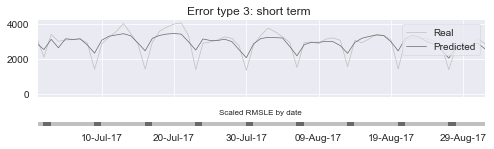

In [92]:
winner = winner_site3.copy()
df = df_site3.copy()
df.set_index("building_id", inplace=True)
df = (df > 0.04).astype(int)

error_name = "3"
desc = "short term"
bdg = 439
color_normal = "silver"
color = "dimgrey"
ratios = [3,0.2]
start = dt.date(2017, 7, 1)
end = dt.date(2017, 9, 1)

#Create figure canvas
fig, axes = plt.subplots(2, 1, sharex = True, sharey=False, figsize=(7,2), gridspec_kw = {"height_ratios": ratios})
axes = axes.flatten()

# METER READING AND PREDICTION LINEPLOT
temp = winner.loc[winner.building_id == bdg,["timestamp","meter_reading","submission"]]
temp.set_index("timestamp",inplace=True)
# Resample
temp = temp.resample('24H').sum().reset_index()

ax = axes[0]
sns.lineplot(data=temp, x="timestamp",y="meter_reading", ax=ax, color=color_normal, linewidth = 0.7)
sns.lineplot(data=temp, x="timestamp",y="submission", ax=ax, color=color, linewidth = 0.7)
ax.set_xlim([start, end])
ax.set_ylabel("")
#ax.set_title(f"Electricity - Building {bdg}",fontsize=8)
ax.legend(labels=['Real','Predicted'], loc = "upper right")

# ERROR HEATMAP
# Get the data
y = np.linspace(0, 1, 2)
x = pd.date_range(start='2017-01-01', end='2019-01-01')
temp1 = pd.DataFrame(df.loc[bdg,:]).T
# Error heatmap Plot
ax = axes[-1]
cmap = ListedColormap([color_normal, color, color])
cmap.set_bad(color=color)
qmesh = ax.pcolormesh(x, y, temp1, cmap=cmap, rasterized=True)
ax.xaxis.set_major_locator(plt.MaxNLocator(7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
ax.set_xlim([start, end])
ax.set_title(f"Scaled RMSLE by date",fontsize=8)
ax.set_yticklabels([])

# Figure parameters
plt.tight_layout()
fig.suptitle(f"Error type {error_name}: {desc}", y = 1.015, x = 0.5, fontsize=12)

fig.savefig(path_fig + f"error{error_name}_example.pdf", dpi=150, bbox_inches="tight")
fig.savefig(path_fig + f"error{error_name}_example.png", dpi=150, bbox_inches="tight")

## Error 4: flucation error
Electricity - Site 3 - Bdg 449

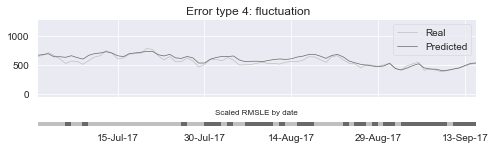

In [93]:
winner = winner_site3.copy()
df = df_site3.copy()
df.set_index("building_id", inplace=True)
df = (df > 0.015).astype(int)

error_name = "4"
desc = "fluctuation"
bdg = 449
color_normal = "silver"
color = "dimgrey"
ratios = [3,0.2]
start = dt.date(2017, 7, 1)
end = dt.date(2017, 9, 15)

#Create figure canvas
fig, axes = plt.subplots(2, 1, sharex = True, sharey=False, figsize=(7,2), gridspec_kw = {"height_ratios": ratios})
axes = axes.flatten()

# METER READING AND PREDICTION LINEPLOT
temp = winner.loc[winner.building_id == bdg,["timestamp","meter_reading","submission"]]
temp.set_index("timestamp",inplace=True)
# Resample
temp = temp.resample('24H').sum().reset_index()

ax = axes[0]
sns.lineplot(data=temp, x="timestamp",y="meter_reading", ax=ax, color=color_normal, linewidth = 0.7)
sns.lineplot(data=temp, x="timestamp",y="submission", ax=ax, color=color, linewidth = 0.7)
ax.set_xlim([start, end])
ax.set_ylabel("")
#ax.set_title(f"Electricity - Building {bdg}",fontsize=8)
ax.legend(labels=['Real','Predicted'], loc = "upper right")

# ERROR HEATMAP
# Get the data
y = np.linspace(0, 1, 2)
x = pd.date_range(start='2017-01-01', end='2019-01-01')
temp1 = pd.DataFrame(df.loc[bdg,:]).T
# Error heatmap Plot
ax = axes[-1]
cmap = ListedColormap([color_normal, color, color])
cmap.set_bad(color=color)
qmesh = ax.pcolormesh(x, y, temp1, cmap=cmap, rasterized=True)
ax.xaxis.set_major_locator(plt.MaxNLocator(7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
ax.set_xlim([start, end])
ax.set_title(f"Scaled RMSLE by date",fontsize=8)
ax.set_yticklabels([])

# Figure parameters
plt.tight_layout()
fig.suptitle(f"Error type {error_name}: {desc}", y = 1.015, x = 0.5, fontsize=12)

fig.savefig(path_fig + f"error{error_name}_example.pdf", dpi=150, bbox_inches="tight")
fig.savefig(path_fig + f"error{error_name}_example.png", dpi=150, bbox_inches="tight")

## Old plots
### A errors

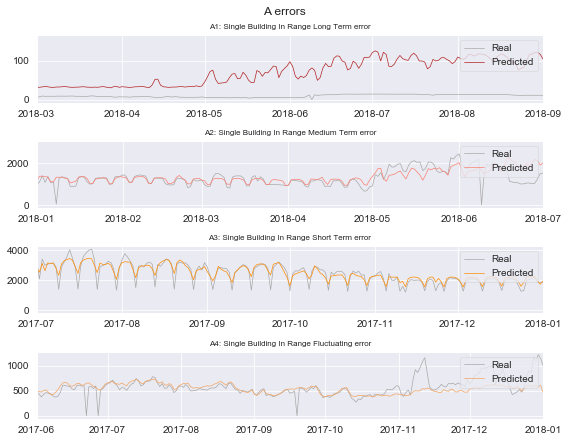

In [89]:
winner = winner_site3.copy()

#Create figure canvas
fig, axes = plt.subplots(4, 1, sharex = False, sharey=False, figsize=(8,6))
axes = axes.flatten()
color_normal = "darkgray"

# A1
error_name = "A1"
bdg = 357
color = "firebrick"
start = dt.date(2018, 3, 1)
end = dt.date(2018, 9, 1)
## Data
temp = winner.loc[winner.building_id == bdg,["timestamp","meter_reading","submission"]]
temp.set_index("timestamp",inplace=True)
## Resample
temp = temp.resample('24H').sum().reset_index()
## Plot
ax = axes[0]
sns.lineplot(data=temp, x="timestamp",y="meter_reading", ax=ax, color=color_normal, linewidth = 0.7)
sns.lineplot(data=temp, x="timestamp",y="submission", ax=ax, color=color, linewidth = 0.7)
ax.set_xlim([start, end])
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title(f"{error_name}: Single Building In Range Long Term error",fontsize=8)
ax.legend(labels=['Real','Predicted'], loc = "upper right")

# A2
error_name = "A2"
bdg = 495
color = "salmon"
start = dt.date(2018, 1, 1)
end = dt.date(2018, 7, 1)
## Data
temp = winner.loc[winner.building_id == bdg,["timestamp","meter_reading","submission"]]
temp.set_index("timestamp",inplace=True)
## Resample
temp = temp.resample('24H').sum().reset_index()
## Plot
ax = axes[1]
sns.lineplot(data=temp, x="timestamp",y="meter_reading", ax=ax, color=color_normal, linewidth = 0.7)
sns.lineplot(data=temp, x="timestamp",y="submission", ax=ax, color=color, linewidth = 0.7)
ax.set_xlim([start, end])
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title(f"{error_name}: Single Building In Range Medium Term error",fontsize=8)
ax.legend(labels=['Real','Predicted'], loc = "upper right")

# A3
error_name = "A3"
bdg = 439
color = "darkorange"
start = dt.date(2017, 7, 1)
end = dt.date(2018, 1, 1)
## Data
temp = winner.loc[winner.building_id == bdg,["timestamp","meter_reading","submission"]]
temp.set_index("timestamp",inplace=True)
## Resample
temp = temp.resample('24H').sum().reset_index()
## Plot
ax = axes[2]
sns.lineplot(data=temp, x="timestamp",y="meter_reading", ax=ax, color=color_normal, linewidth = 0.7)
sns.lineplot(data=temp, x="timestamp",y="submission", ax=ax, color=color, linewidth = 0.7)
ax.set_xlim([start, end])
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title(f"{error_name}: Single Building In Range Short Term error",fontsize=8)
ax.legend(labels=['Real','Predicted'], loc = "upper right")

# A4
error_name = "A4"
bdg = 449
color = "sandybrown"
start = dt.date(2017, 6, 1)
end = dt.date(2018, 1, 1)
## Data
temp = winner.loc[winner.building_id == bdg,["timestamp","meter_reading","submission"]]
temp.set_index("timestamp",inplace=True)
## Resample
temp = temp.resample('24H').sum().reset_index()
## Plot
ax = axes[3]
sns.lineplot(data=temp, x="timestamp",y="meter_reading", ax=ax, color=color_normal, linewidth = 0.7)
sns.lineplot(data=temp, x="timestamp",y="submission", ax=ax, color=color, linewidth = 0.7)
ax.set_xlim([start, end])
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title(f"{error_name}: Single Building In Range Fluctuating error",fontsize=8)
ax.legend(labels=['Real','Predicted'], loc = "upper right")

# Figure parameters
plt.tight_layout()
fig.suptitle("A errors", y = 1.015, x = 0.5, fontsize=12)
fig.savefig(path_fig + f"errorA_example.pdf", dpi=150, bbox_inches="tight")
fig.savefig(path_fig + f"errorA_example.png", dpi=150, bbox_inches="tight")

### B errors

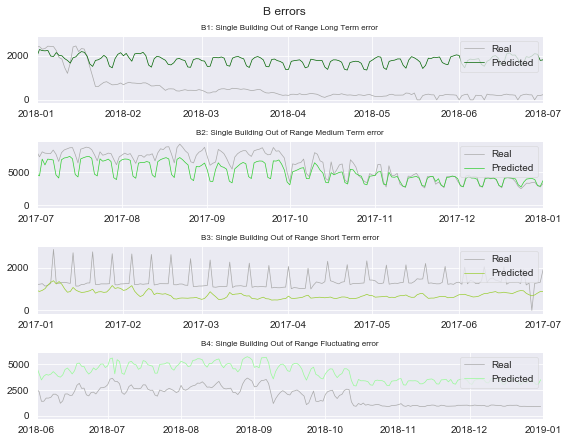

In [8]:
winner = winner_site3.copy()

#Create figure canvas
fig, axes = plt.subplots(4, 1, sharex = False, sharey=False, figsize=(8,6))
axes = axes.flatten()
color_normal = "darkgray"

# B1
error_name = "B1"
bdg = 330
color = "darkgreen"
start = dt.date(2018, 1, 1)
end = dt.date(2018, 7, 1)
## Data
temp = winner.loc[winner.building_id == bdg,["timestamp","meter_reading","submission"]]
temp.set_index("timestamp",inplace=True)
## Resample
temp = temp.resample('24H').sum().reset_index()
## Plot
ax = axes[0]
sns.lineplot(data=temp, x="timestamp",y="meter_reading", ax=ax, color=color_normal, linewidth = 0.7)
sns.lineplot(data=temp, x="timestamp",y="submission", ax=ax, color=color, linewidth = 0.7)
ax.set_xlim([start, end])
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title(f"{error_name}: Single Building Out of Range Long Term error",fontsize=8)
ax.legend(labels=['Real','Predicted'], loc = "upper right")

# B2
error_name = "B2"
bdg = 387
color = "limegreen"
start = dt.date(2017, 7, 1)
end = dt.date(2018, 1, 1)
## Data
temp = winner.loc[winner.building_id == bdg,["timestamp","meter_reading","submission"]]
temp.set_index("timestamp",inplace=True)
## Resample
temp = temp.resample('24H').sum().reset_index()
## Plot
ax = axes[1]
sns.lineplot(data=temp, x="timestamp",y="meter_reading", ax=ax, color=color_normal, linewidth = 0.7)
sns.lineplot(data=temp, x="timestamp",y="submission", ax=ax, color=color, linewidth = 0.7)
ax.set_xlim([start, end])
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title(f"{error_name}: Single Building Out of Range Medium Term error",fontsize=8)
ax.legend(labels=['Real','Predicted'], loc = "upper right")

# B3
error_name = "B3"
bdg = 437
color = "yellowgreen"
start = dt.date(2017, 1, 1)
end = dt.date(2017, 7, 1)
## Data
temp = winner.loc[winner.building_id == bdg,["timestamp","meter_reading","submission"]]
temp.set_index("timestamp",inplace=True)
## Resample
temp = temp.resample('24H').sum().reset_index()
## Plot
ax = axes[2]
sns.lineplot(data=temp, x="timestamp",y="meter_reading", ax=ax, color=color_normal, linewidth = 0.7)
sns.lineplot(data=temp, x="timestamp",y="submission", ax=ax, color=color, linewidth = 0.7)
ax.set_xlim([start, end])
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title(f"{error_name}: Single Building Out of Range Short Term error",fontsize=8)
ax.legend(labels=['Real','Predicted'], loc = "upper right")

# B4
error_name = "B4"
bdg = 471
color = "palegreen"
start = dt.date(2018, 6, 1)
end = dt.date(2019, 1, 1)
## Data
temp = winner.loc[winner.building_id == bdg,["timestamp","meter_reading","submission"]]
temp.set_index("timestamp",inplace=True)
## Resample
temp = temp.resample('24H').sum().reset_index()
## Plot
ax = axes[3]
sns.lineplot(data=temp, x="timestamp",y="meter_reading", ax=ax, color=color_normal, linewidth = 0.7)
sns.lineplot(data=temp, x="timestamp",y="submission", ax=ax, color=color, linewidth = 0.7)
ax.set_xlim([start, end])
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title(f"{error_name}: Single Building Out of Range Fluctuating error",fontsize=8)
ax.legend(labels=['Real','Predicted'], loc = "upper right")

# Figure parameters
plt.tight_layout()
fig.suptitle("B errors", y = 1.015, x = 0.5, fontsize=12)
fig.savefig(path_fig + f"errorB_example.pdf", dpi=150, bbox_inches="tight")
fig.savefig(path_fig + f"errorB_example.png", dpi=150, bbox_inches="tight")